# Small problem and demonstration of the plotting functions

In [3]:
from pLaplace_2D import mesh
mesh_obj = mesh.Mesh2D()
mesh_obj.load_from_matfile('pLaplace_2D/data_export_matlab/mesh_2D_level1.mat')

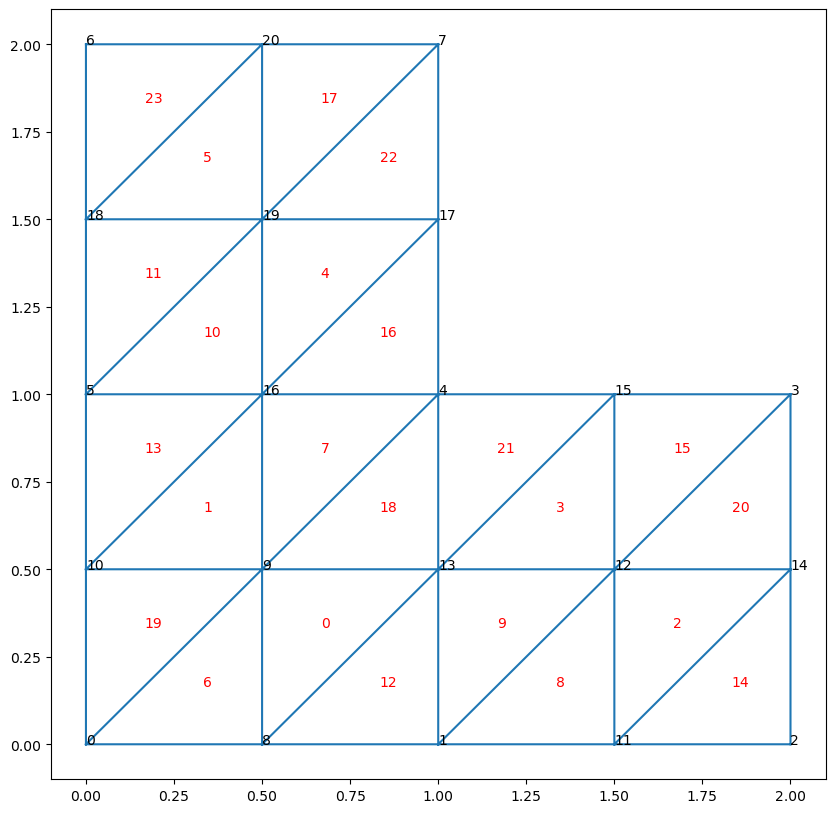

Number of nodes: 21
Number of elements: 24
Number of free nodes: 5


In [4]:
mesh_obj.plot_triangulation()
mesh_obj.print_statistics()

In [5]:
from pLaplace_2D import energy_numpy
energy_obj = energy_numpy.EnergySFD(mesh_obj)
f, df, ddf = energy_obj.recompile(verbose=True, tol=1e-3)

In [6]:
from tools import minimizers
import numpy as np
x0 = np.random.rand(energy_obj.u.shape[0])


In [7]:
res_my = minimizers.trust_region2(f, df, ddf, x0, c0=1, tolf=1e-9, maxit=100, verbose=True)

Iterations in CG solver: 5.
it=1, f=-5.191511251243476, fstep = 1.01997e+01, ||g||=7.98913, nitf=28, a=-1.99691e-01, b=3.32470e-01, c=1.00000e+00
Iterations in CG solver: 4.
it=2, f=-5.89073678542673, fstep = 6.99226e-01, ||g||=3.66335, nitf=30, a=-8.84956e-02, b=2.37795e-01, c=1.00000e+00
Iterations in CG solver: 4.
it=3, f=-5.9319708595848315, fstep = 4.12341e-02, ||g||=0.86471, nitf=36, a=-9.97133e-02, b=1.27866e-01, c=1.00000e-01
Iterations in CG solver: 4.
it=4, f=-5.934126059908674, fstep = 2.15520e-03, ||g||=0.20587, nitf=39, a=-9.34628e-02, b=1.26897e-01, c=1.00000e-01
Iterations in CG solver: 3.
it=5, f=-5.934243926351109, fstep = 1.17866e-04, ||g||=0.04806, nitf=40, a=-9.32265e-02, b=1.39611e-01, c=1.00000e-01
Iterations in CG solver: 3.
it=6, f=-5.934250809899829, fstep = 6.88355e-06, ||g||=0.01179, nitf=61, a=-9.08169e-02, b=1.35241e-01, c=1.00000e-01
Iterations in CG solver: 3.
it=7, f=-5.934251199009507, fstep = 3.89110e-07, ||g||=0.00277, nitf=74, a=-9.23157e-02, b=1.427

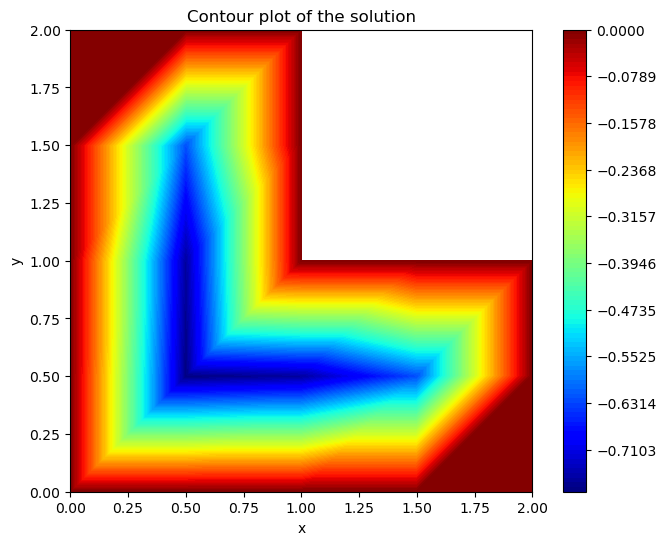

In [8]:
v = energy_obj.u_0.copy()
v[energy_obj.free_nodes] = res_my.x
mesh_obj.plot_solution(np.array(v), type='contour', levels=100)

# Large problem

In [9]:
from pLaplace_2D import mesh
mesh_obj = mesh.Mesh2D()
mesh_obj.load_from_matfile('pLaplace_2D/data_export_matlab/mesh_2D_level7.mat')
mesh_obj.print_statistics()

Number of nodes: 49665
Number of elements: 98304
Number of free nodes: 48641


In [10]:
from pLaplace_2D import energy_numpy
energy_obj = energy_numpy.EnergySFD(mesh_obj)
f, df, ddf = energy_obj.recompile(verbose=True, solver="amg")

In [11]:
from tools import minimizers
import numpy as np
x0 = np.random.rand(energy_obj.u.shape[0])

In [12]:
res_my = minimizers.newton2(f, df, ddf, x0, tolf=1e-9, maxit=100, verbose=True)

Iterations in AMG solver: 7.
it=1, f=10.73814, fstep = 5.26053e+05, ||g||=28260.72752, nitf=10, a=1.97561e+00
Iterations in AMG solver: 17.
it=2, f=-1.66199, fstep = 1.24001e+01, ||g||=6.94858, nitf=10, a=9.42353e-01
Iterations in AMG solver: 13.
it=3, f=-6.57721, fstep = 4.91523e+00, ||g||=10.57358, nitf=10, a=5.66878e-01
Iterations in AMG solver: 7.
it=4, f=-7.79149, fstep = 1.21428e+00, ||g||=5.55873, nitf=10, a=8.10796e-01
Iterations in AMG solver: 6.
it=5, f=-7.95556, fstep = 1.64067e-01, ||g||=1.77431, nitf=10, a=1.07391e+00
Iterations in AMG solver: 4.
it=6, f=-7.95828, fstep = 2.71527e-03, ||g||=0.22486, nitf=14, a=1.10863e+00
Iterations in AMG solver: 4.
it=7, f=-7.95829, fstep = 1.51437e-05, ||g||=0.01532, nitf=22, a=1.02391e+00


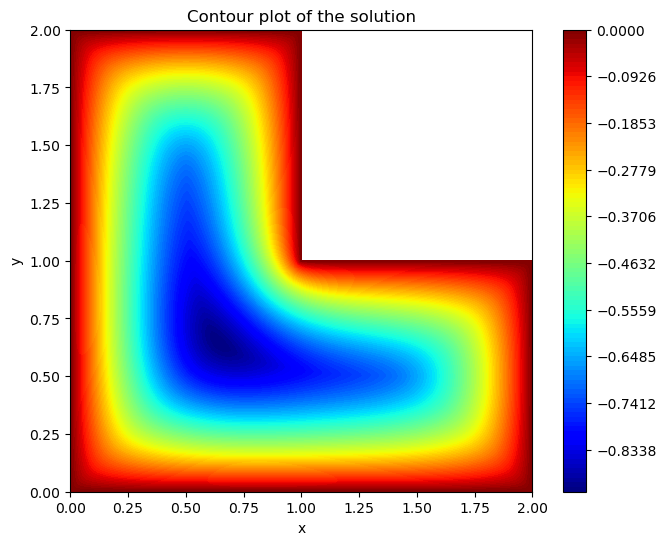

In [13]:
v = energy_obj.u_0.copy()
v[energy_obj.free_nodes] = res_my.x
mesh_obj.plot_solution(np.array(v), type='contour', levels=100)

In [40]:
from pLaplace_2D.suplement_matrices import stiffness_matrix
import pyamg
A_stiff = stiffness_matrix(mesh_obj)[mesh_obj.free_nodes, :][:, mesh_obj.free_nodes]  # type: ignore

# Create a diagonal preconditioner
#preconditioner = diags(1 / A_stiff.diagonal())

# Solve the system using cg with the preconditioner
#x0, info = cg(A_stiff, energy_obj.fx[mesh_obj.free_nodes], M=preconditioner, maxiter=100)
ml = pyamg.ruge_stuben_solver(A_stiff)
residuals = []
sol = ml.solve(energy_obj.fx[mesh_obj.free_nodes], tol=1e-3, residuals=residuals, maxiter=20)
print(len(residuals))

5


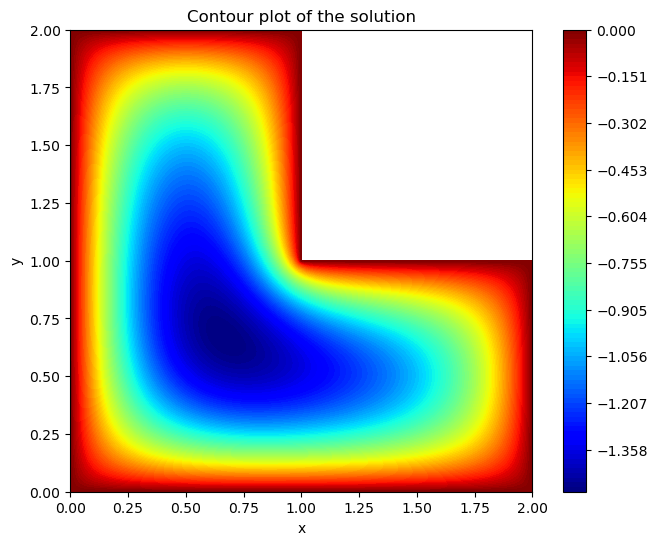

In [41]:
v = energy_obj.u_0.copy()
v[energy_obj.free_nodes] = x0

mesh_obj.plot_solution(np.array(v), type='contour', levels=100)